In [2]:
library("ggplot2")
library("dplyr")
library("tidyverse")
library(stringr)

In [3]:
title_basics=read.delim('../../IMDb_Datasets_Filtered/filtered.title.basics.tsv',header=TRUE)

In [4]:
nrow(title_basics)

[1] 1443759

In [5]:
head(title_basics)
tail(title_basics)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
2,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
3,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
4,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
5,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
6,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1443754,tt9916724,short,Hay Que Ser Paciente,Hay Que Ser Paciente,0,2015,\N,3,"Documentary,Short"
1443755,tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,\N
1443756,tt9916754,movie,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,0,2013,\N,49,Documentary
1443757,tt9916756,short,Pretty Pretty Black Girl,Pretty Pretty Black Girl,0,2019,\N,\N,Short
1443758,tt9916764,short,38,38,0,2018,\N,\N,Short
1443759,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [6]:
tb_clean = title_basics #Changes will take place in the tb_clean variable

## primaryTitle and originalTitle

In [7]:
tb_clean$primaryTitle = NULL
tb_clean$originalTitle = NULL
#Accordind to MJ, "both of these features don't add relevant and usable information 
#(analyse of strings is very high computatinal cost)"

## isAdult

In [8]:
tb_clean$isAdult = as.factor(tb_clean$isAdult) #Don't know why I did this... isAdult is an int

In [9]:
nrow(tb_clean[tb_clean$isAdult==1,])/nrow(tb_clean) #Percentage of adult movies

[1] 0.007147315

## startYear

In [10]:
nrow(tb_clean[tb_clean$startYear=="\\N",])/nrow(tb_clean)

[1] 0.06107598

In [11]:
# remove NA
tb_clean = tb_clean[tb_clean$startYear!="\\N",]
tb_clean$startYear = factor(tb_clean$startYear)

In [12]:
# convert to numeric type
tb_clean$startYear = as.numeric(as.character(tb_clean$startYear))

In [13]:
tb_clean = tb_clean[tb_clean$startYear!=2115,] #This is ridiculous

## endYear

In [14]:
tb_clean$endYear = NULL #End Years are just for Series

## runtimeMinutes

In [15]:
nrow(tb_clean[tb_clean$runtimeMinutes=="\\N",])/nrow(tb_clean)
#MJ removed these rows, but I don't think it's a good idea...

[1] 0.3235724

In [16]:
runtimeMinutes=tb_clean$runtimeMinutes #Creating an array with all the runtimeMinutes
runtimeMinutes[runtimeMinutes=='\\N']='-1' #Replacing the '\N' in the array by '-1'
tb_clean$runtimeMinutes=runtimeMinutes #Replacing the column by the updated column

In [17]:
tb_clean$runtimeMinutes = factor(tb_clean$runtimeMinutes)
# convert to numeric type
tb_clean$runtimeMinutes = as.numeric(as.character(tb_clean$runtimeMinutes))

In [18]:
nrow(tb_clean[tb_clean$runtimeMinutes>240,])/nrow(tb_clean) #Movies with more than 4 hours

[1] 0.0006617099

In [19]:
#Going to remove the movies with more than 4h
tb_clean = tb_clean[tb_clean$runtimeMinutes<=240,]

## genres

In [20]:
nrow(tb_clean[tb_clean$genres=="\\N",])/nrow(tb_clean)

[1] 0.05663322

In [21]:
# removing \N
tb_clean = tb_clean[tb_clean$genres!="\\N",]
tb_clean$genres = factor(tb_clean$genres)

In [22]:
nrow(tb_clean)

[1] 1277962

## Creating columns for the genres

In [23]:
nrow(tb_clean[tb_clean$genres=='\\N',]) #As expected there are no rows with \N in the genres

[1] 0

In [24]:
genres= str_split(tb_clean$genres,',')

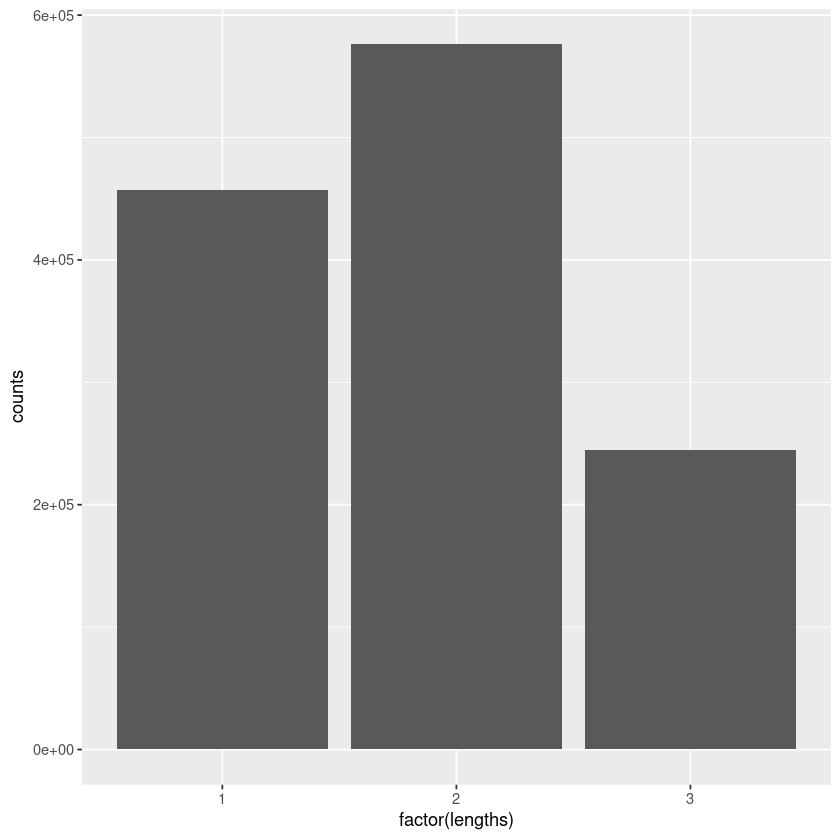

In [25]:
count_1 = length(which(lengths(genres) == 1))
count_2 = length(which(lengths(genres) == 2))
count_3 = length(which(lengths(genres) == 3))
lengths = c(1,2,3)
counts=c(count_1,count_2,count_3)
genres_counts = data.frame(lengths,counts)
ggplot(genres_counts,aes(x=factor(lengths),y=counts))+geom_bar(stat="identity")

In [26]:
tb_clean = separate(tb_clean,genres,c("genre1","genre2","genre3"),",")

Warning message:
“Expected 3 pieces. Missing pieces filled with `NA` in 1033202 rows [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, ...].”


In [27]:
head(tb_clean)
tail(tb_clean)

,tconst,titleType,isAdult,startYear,runtimeMinutes,genre1,genre2,genre3
,<chr>,<chr>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,tt0000001,short,0,1894,1,Documentary,Short,NA
2,tt0000002,short,0,1892,5,Animation,Short,NA
3,tt0000003,short,0,1892,4,Animation,Comedy,Romance
4,tt0000004,short,0,1892,12,Animation,Short,NA
5,tt0000005,short,0,1893,1,Comedy,Short,NA
6,tt0000006,short,0,1894,1,Short,NA,NA


,tconst,titleType,isAdult,startYear,runtimeMinutes,genre1,genre2,genre3
,<chr>,<chr>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1443753,tt9916720,short,0,2019,10,Comedy,Horror,Mystery
1443754,tt9916724,short,0,2015,3,Documentary,Short,NA
1443756,tt9916754,movie,0,2013,49,Documentary,NA,NA
1443757,tt9916756,short,0,2019,-1,Short,NA,NA
1443758,tt9916764,short,0,2018,-1,Short,NA,NA
1443759,tt9916856,short,0,2015,27,Short,NA,NA


In [28]:
#Assigning global constant 0 to the ones that have NA
tb_clean$genre1[is.na(tb_clean$genre1)]=0
tb_clean$genre2[is.na(tb_clean$genre2)]=0
tb_clean$genre3[is.na(tb_clean$genre3)]=0

In [29]:
head(tb_clean)
tail(tb_clean)

,tconst,titleType,isAdult,startYear,runtimeMinutes,genre1,genre2,genre3
,<chr>,<chr>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,tt0000001,short,0,1894,1,Documentary,Short,0
2,tt0000002,short,0,1892,5,Animation,Short,0
3,tt0000003,short,0,1892,4,Animation,Comedy,Romance
4,tt0000004,short,0,1892,12,Animation,Short,0
5,tt0000005,short,0,1893,1,Comedy,Short,0
6,tt0000006,short,0,1894,1,Short,0,0


,tconst,titleType,isAdult,startYear,runtimeMinutes,genre1,genre2,genre3
,<chr>,<chr>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1443753,tt9916720,short,0,2019,10,Comedy,Horror,Mystery
1443754,tt9916724,short,0,2015,3,Documentary,Short,0
1443756,tt9916754,movie,0,2013,49,Documentary,0,0
1443757,tt9916756,short,0,2019,-1,Short,0,0
1443758,tt9916764,short,0,2018,-1,Short,0,0
1443759,tt9916856,short,0,2015,27,Short,0,0


## Writing to a tsv file

In [30]:
library(readr)
write_tsv(tb_clean,'cleaned_filtered_title_basics.tsv')